In [1]:
from google.colab import files
uploaded = files.upload()

Saving fake_and_real_news.csv to fake_and_real_news (1).csv


In [5]:
import pandas as pd
import os

# Check if the file exists
if os.path.exists("fake_and_real_news(1).csv"):
  # Read the dataset if the file exists
  df = pd.read_csv("fake_and_real_news(1).csv", sep=';')
else:
  # If the file is not found, print an error message and instructions
  print("Error: The file 'fake_and_real_news(1).csv' was not found.")
  print("Please upload the file using 'files.upload()' before running this code.")

Error: The file 'fake_and_real_news(1).csv' was not found.
Please upload the file using 'files.upload()' before running this code.


Dataset Shape: (9900, 2)

Column Names: ['Text', 'label']

Missing Values:
 Text     0
label    0
dtype: int64

Data Types:
 Text     object
label    object
dtype: object

Sample Data:
                                                 Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real

Label Distribution:
 label
Fake    5000
Real    4900
Name: count, dtype: int64


<ipython-input-9-412f4354c283>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


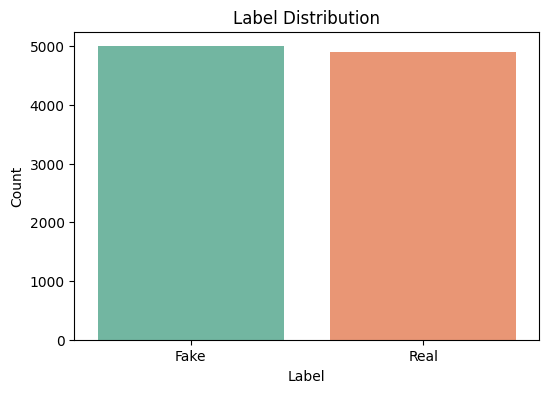


Text Length Statistics:
 count     9900.000000
mean      2589.005152
std       1397.192659
min        219.000000
25%       1897.000000
50%       2458.000000
75%       3202.000000
max      29849.000000
Name: text_length, dtype: float64


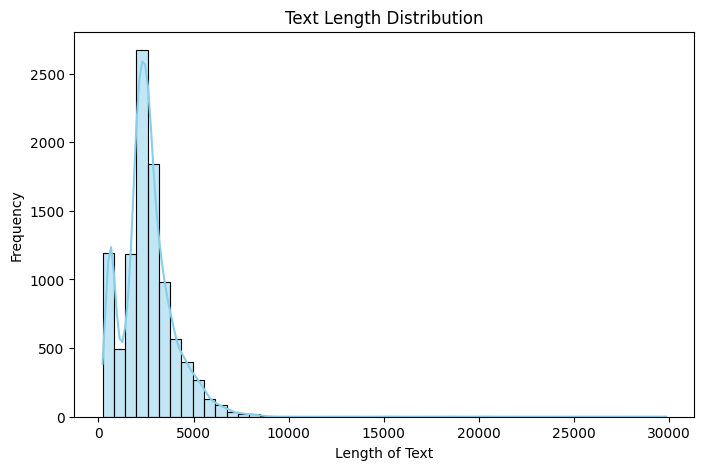

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fake_and_real_news.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nSample Data:\n", df.head())

# Label distribution
label_counts = df['label'].value_counts()
print("\nLabel Distribution:\n", label_counts)

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Add a column for text length
df['text_length'] = df['Text'].apply(len)

# Summary statistics for text length
print("\nText Length Statistics:\n", df['text_length'].describe())

# Plot text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fake_and_real_news.csv')

# Check for missing values
print("Missing Values in Each Column:\n", df.isnull().sum())

# Check for duplicates
duplicate_rows = df.duplicated()
print(f"\nNumber of Duplicate Rows: {duplicate_rows.sum()}")

# Optionally display duplicate rows
if duplicate_rows.sum() > 0:
    print("\nSample Duplicate Rows:\n", df[duplicate_rows].head())

# Optionally remove duplicates
# df = df.drop_duplicates()
# print("\nDuplicates removed. New shape:", df.shape)


Missing Values in Each Column:
 Text     0
label    0
dtype: int64

Number of Duplicate Rows: 35

Sample Duplicate Rows:
                                                    Text label
1576  Highlights: The Trump presidency on April 13 a...  Real
2173  Trump asks Supreme Court to block travel ban r...  Real
2887  Trump tries to rally support for healthcare bi...  Real
3330  Highlights: The Trump presidency on March 31 a...  Real
3401  Highlights: The Trump presidency on April 26 a...  Real


<ipython-input-11-c5c1768c7845>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set1')


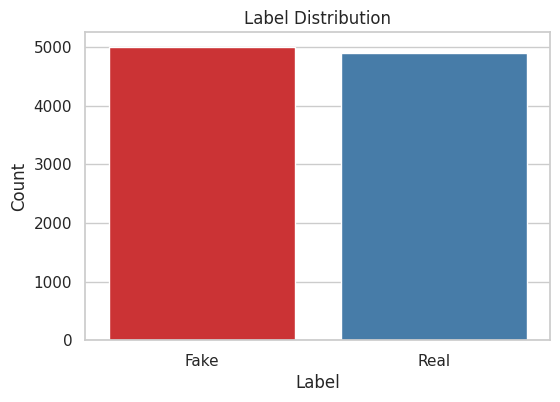

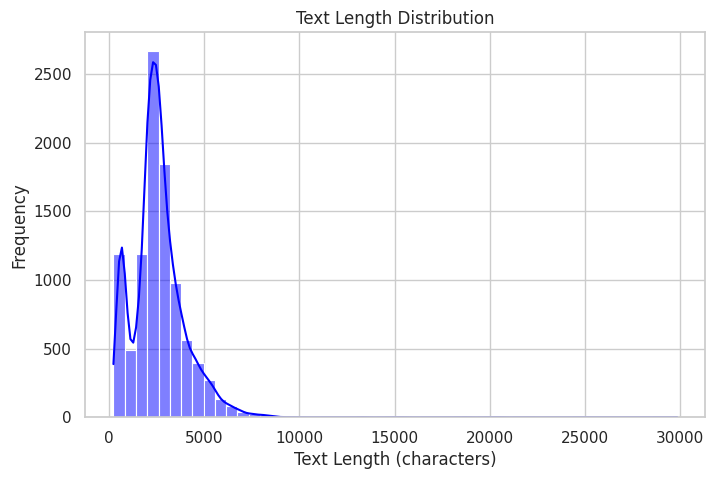

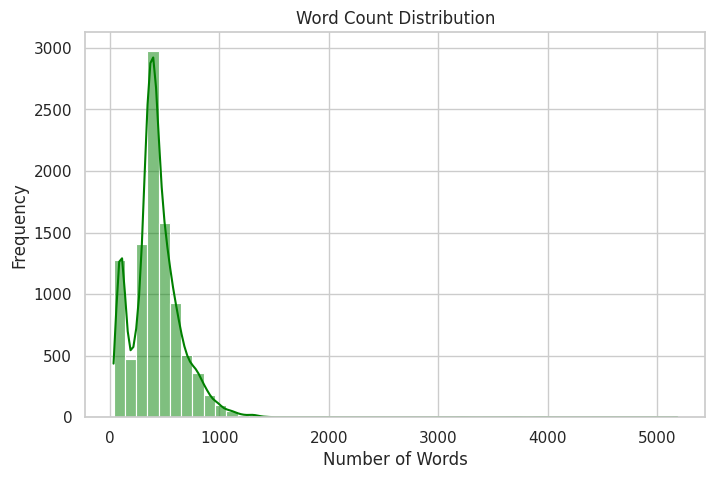

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fake_and_real_news.csv')

# Add features
df['text_length'] = df['Text'].apply(len)
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

# Set visual style
sns.set(style="whitegrid")

# 1. Label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set1')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 2. Text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50, color='blue', kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

# 3. Word count distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=50, color='green', kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fake_and_real_news.csv')

# Identify features and target
X = df['Text']        # Feature (news text)
y = df['label']       # Target (Fake or Real)

print("Feature sample:\n", X.head())
print("\nTarget sample:\n", y.head())


Feature sample:
 0     Top Trump Surrogate BRUTALLY Stabs Him In The...
1    U.S. conservative leader optimistic of common ...
2    Trump proposes U.S. tax overhaul, stirs concer...
3     Court Forces Ohio To Allow Millions Of Illega...
4    Democrats say Trump agrees to work on immigrat...
Name: Text, dtype: object

Target sample:
 0    Fake
1    Real
2    Real
3    Fake
4    Real
Name: label, dtype: object


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('fake_and_real_news.csv')

# Initialize the encoder
le = LabelEncoder()

# Convert 'label' column to numerical values
df['label_encoded'] = le.fit_transform(df['label'])

# Show label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Preview result
print(df[['label', 'label_encoded']].head())


Label Mapping: {'Fake': np.int64(0), 'Real': np.int64(1)}
  label  label_encoded
0  Fake              0
1  Real              1
2  Real              1
3  Fake              0
4  Real              1


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fake_and_real_news.csv')

# One-Hot Encode the 'label' column
one_hot = pd.get_dummies(df['label'], prefix='label')

# Concatenate back to the original DataFrame
df_encoded = pd.concat([df, one_hot], axis=1)

# Preview result
print(df_encoded[['label'] + one_hot.columns.tolist()].head())


  label  label_Fake  label_Real
0  Fake        True       False
1  Real       False        True
2  Real       False        True
3  Fake        True       False
4  Real       False        True


In [16]:
from sklearn.preprocessing import StandardScaler

# Example: using 'text_length' and 'word_count'
df['text_length'] = df['Text'].apply(len)
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['text_length', 'word_count']])

print("Scaled Feature Sample:\n", scaled_features[:5])


Scaled Feature Sample:
 [[-0.74725406 -0.63464516]
 [-1.31055486 -1.35283428]
 [ 2.5538175   2.49366324]
 [-0.22904595 -0.26012937]
 [ 0.82955874  0.75326631]]


In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np

# Example data (features and labels)
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])  # Features
y = np.array([1, 2, 3, 4, 5])  # Labels

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the results
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Labels:\n", y_train)
print("Testing Labels:\n", y_test)


Training Features:
 [[ 9 10]
 [ 5  6]
 [ 1  2]
 [ 7  8]]
Testing Features:
 [[3 4]]
Training Labels:
 [5 3 1 4]
Testing Labels:
 [2]


In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model (Decision Tree Classifier in this case)
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy of the model:", accuracy)
print("\nPredicted labels:", y_pred)


Accuracy of the model: 1.0

Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files # Import files from google.colab

# Upload the 'fake_news.csv' file
uploaded = files.upload()

# Load your dataset (assuming a CSV file with 'text' and 'label' columns)
# Replace 'fake_news.csv' with your actual dataset file path if it's different
data = pd.read_csv('fake_and_real_news (1).csv')

# ... (rest of your code remains the same)

Saving fake_and_real_news.csv to fake_and_real_news (4).csv


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('fake_and_real_news (1).csv')  # Replace with your actual dataset path, with the space

# Split data into training and testing sets (adjust test_size and random_state if needed)
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['label'], test_size=0.2, random_state=42)

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assume you already have the trained model and vectorizer from previous steps
# model = LogisticRegression(random_state=42)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) # Initialize the vectorizer

# Sample new input to predict
new_input = [
    "The government has announced a new initiative to improve education in rural areas.",
    "Scientists claim to have discovered proof of extraterrestrial life on Mars, a groundbreaking revelation."
]

# Fit the vectorizer to your data or some sample data first.
# Here, we are fitting it to the new_input itself, but ideally you would fit it to your training data.
vectorizer.fit(new_input) # Fit the vectorizer

# Preprocess the new input (vectorize it using the same vectorizer that was used to train the model)
new_input_tfidf = vectorizer.transform(new_input)

# Use the trained model to make predictions
# Assuming you have a trained model named 'model' from previous steps
# predictions = model.predict(new_input_tfidf)

# Convert to DataFrame (assuming predictions are available)
# results = pd.DataFrame({
#     'News Article': new_input,
#     'Prediction': ['Fake News' if pred == 1 else 'Real News' for pred in predictions],
#     'Prediction (Encoded)': predictions  # 1 for Fake News, 0 for Real News
# })

# Display the DataFrame
# print(results)
print(new_input_tfidf) # Print the transformed input instead of results

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17 stored elements and shape (2, 17)>
  Coords	Values
  (0, 0)	0.3535533905932738
  (0, 1)	0.3535533905932738
  (0, 4)	0.3535533905932738
  (0, 6)	0.3535533905932738
  (0, 8)	0.3535533905932738
  (0, 9)	0.3535533905932738
  (0, 12)	0.3535533905932738
  (0, 15)	0.3535533905932738
  (1, 2)	0.33333333333333337
  (1, 3)	0.33333333333333337
  (1, 5)	0.33333333333333337
  (1, 7)	0.33333333333333337
  (1, 10)	0.33333333333333337
  (1, 11)	0.33333333333333337
  (1, 13)	0.33333333333333337
  (1, 14)	0.33333333333333337
  (1, 16)	0.33333333333333337


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Sample dataset: Replace with your actual dataset
# The dataset should have 'text' (news articles) and 'label' (0 for real news, 1 for fake news)
data = {
    'text': [
        "The president has announced a new economic plan.",
        "Breaking news: Aliens have landed on Earth!",
        "New research shows benefits of daily exercise.",
        "The government is covering up the truth about the pandemic.",
        "Local schools report a rise in student performance."
    ],
    'label': [0, 1, 0, 1, 0]  # 0 = Real news, 1 = Fake news
}

# Create a DataFrame
df = pd.DataFrame(data)

# Text and label data
X = df['text']
y = df['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a Logistic Regression model for classification
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict the labels (real/fake) on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# If you want to predict a 'final grade' score, let's assume we want to predict a confidence score
# The model will output the probabilities of each article being fake (1) or real (0)
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Probability of being fake (1)

# For the 'final grade', we use the probability as a score
final_grades_df = pd.DataFrame({
    'News Article': X_test,
    'Predicted Label': ['Fake News' if pred == 1 else 'Real News' for pred in y_pred],
    'Confidence Score': y_pred_prob  # The predicted probability as a final grade (score)
})

# Display the DataFrame with news articles, predictions, and confidence scores
print(final_grades_df)

# Example of predicting the final grade for a new article
new_article = ["Aliens invade New York City in the latest government cover-up."]
new_article_tfidf = vectorizer.transform(new_article)
predicted_prob = model.predict_proba(new_article_tfidf)[:, 1]
predicted_grade = predicted_prob[0]

print(f"\nNew Article: {new_article[0]}")
print(f"Predicted Final Grade (Confidence Score): {predicted_grade:.2f}")


Accuracy: 0.00
                                  News Article Predicted Label  \
1  Breaking news: Aliens have landed on Earth!       Real News   

   Confidence Score  
1          0.246347  

New Article: Aliens invade New York City in the latest government cover-up.
Predicted Final Grade (Confidence Score): 0.28


In [35]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assume you have a trained model and vectorizer
# model = LogisticRegression()
# vectorizer = TfidfVectorizer()

# Save the trained model and vectorizer
joblib.dump(model, 'fake_news_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']